In [1]:
#!/usr/bin/env python3
#import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_transaction = pd.read_csv('/Users/krahman/work/fraud_detection/data/train_transaction.csv')
train_identity = pd.read_csv('/Users/krahman/work/fraud_detection/data/train_identity.csv')
# merging dataframes 
df_train = train_transaction.merge(train_identity, on='TransactionID', how='left')

In [53]:
train_transaction.shape[0]/2

295270.0

In [3]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
# train_transaction.info();

In [6]:
# train_identity.info();

In [7]:
train_transaction_sum = train_transaction.duplicated().sum()
train_identity_sum = train_identity.duplicated().sum()
columns = train_transaction.columns
print('Train transaction duplicates: {}\nTrain identity duplicates: {} \n'.format(train_transaction_sum, train_identity_sum))
# print('Train feature columns:\n', list(columns))

Train transaction duplicates: 0
Train identity duplicates: 0 



In [8]:
# print(train_transaction.shape)
# print(train_identity.shape)

In [9]:
# df_train.shape

In [10]:
# # print(df_train.shape)
# df_fraud = df_train[df_train['isFraud']==1]
# df_no_fraud = df_train[df_train['isFraud']==0]
# print(df_fraud.shape)
# print(df_no_fraud.shape)
# # do we have more information for folks who end up having fraud issues?

In [11]:
# list_fraud = np.sum(df_fraud.isnull())
# list_nofraud = np.sum(df_no_fraud.isnull())

In [12]:
# print(sum(np.sum(df_fraud.isnull())))
# print(sum(np.sum(df_no_fraud.isnull())))

In [13]:
# # What are total null values of each...?
# df_fraud.shape[0]/sum(np.sum(df_fraud.isnull()))

In [14]:
# df_no_fraud.shape[0]/sum(np.sum(df_no_fraud.isnull()))

In [15]:
# determine what features we can drop due to too many missing features
# list_notnull = df_fraud[(df_fraud.isnull())].index
# df_fraud.loc[list_notnull,:]

In [16]:
# df_null = pd.DataFrame(np.sum(df_train.isnull()), columns=['total']).reset_index()

### Assigning columns to specific lists (cat, num, date, etc.)

In [17]:
# dropping columns with more than 50% missing data
length_df = df_train.shape[0]/2
list_temp = []
for val in df_train.columns:
    if np.sum(df_train[val].isnull()) > length_df:
        list_temp.append(val)   
df_train = df_train.drop(list_temp, axis=1)

In [18]:
# c is num, ex, how many addresses associated with card
col_c = [c for c in df_train.columns if c.startswith('C') and (len(c)==2 or len(c)==3)]
# d is num, time/days between transactions
col_d = [d for d in df_train.columns if d.startswith('D') and (len(d)==2 or len(d)==3)]
# m is date of transaction
col_m = [m for m in df_train.columns if m.startswith('M') and (len(m)==2 or len(m)==3)]
# v is num, features created by vesta such as ranking, counting. entity relationships, etc. 
col_v = [v for v in df_train.columns if v.startswith('V') and (len(v)==2 or len(v)==3 or len(v)==4)]
# i is identity information like network and digital signature associated with transaction
col_i = [i for i in df_train.columns if i.startswith('id_') and len(i)==5]
# ca is cat, card information such as card type, etc. 
col_card = [ca for ca in df_train.columns if ca.startswith('card')]

In [20]:
# D = time elapsed between each transaction, card = card information, C = counting, ie how many addresses 
# associated with card, M=True/False, V created features on ranking, counting, etc. 

# column id and target
col_id = ['TransactionID']
col_target = ['isFraud']

# converting categorical columns with numerical values to string types.
col_cat_to_obj = ['addr1','addr2','card1','card2', 'card3', 'card5']
for val in col_cat_to_obj:
    df_train[val] = df_train[val].astype(str)

# categorical columns
col_cat = ['addr1','addr2','ProductCD',"P_emaildomain"] + col_card

# C counter, D is time elapsed between transactions, V feature engineered variables by firm
col_num = ['TransactionAmt'] + col_c + col_d + col_v

# figure out how to handle this. What do these dates mean? Do certain dates have more fraud occurences?
col_date = ['TransactionDT'] 

# boolean columns. convert via dummy variable. We dont know if true/false is better than one or the other. 
col_bool = col_m

# confirming all columns are accounted for
print('Total columns: ' + str(len(col_cat + col_num + col_date + col_bool + col_id + col_i + col_target)))

# col_all = col_cat + col_num + col_date + col_bool + col_id + col_target
# columns removed dist1, dist2, R_emaildomain, DeviceInfo, DeviceType

Total columns: 220


### Filling In Missing Values

In [31]:
# 295270 50%

In [100]:
len(df_train['P_emaildomain'].unique())

60

In [354]:
# df_train[val].dtype=='O'
# len(df_train['D3'].unique())
np.sum(df_train['card4'].isnull())

1577

In [382]:
# df_train.columns
# print(df_train['card4'].dtype)
# len(df_train['card4'].unique())
# df_train['card4'].dtype
# df_train['D1'].unique()
# df_train['card1'].dtype=='O'
# val_temp = (df_train['card1'].dtype=='O')
# val_temp = df_train['card1'].dtype
# val_temp
# isinstance(df_train['D1'], object)
# df_train['card1'].unique().shape 
# val_len = len(df_train['card1'].unique())
# val_len

# np.sum(df_train['D1'].isnull())
# we need to confirm that 195 columns do in fact have null values before proceeding..then we can get the unique
# col value types, then we can begin imputing missing values with the mode values... 

# checking to see how many columns have null values. 195. 
list_temp = []
list_col = []
for val in df_train.columns:
    calc_ = np.sum(df_train[val].isnull())
    list_temp.append(calc_)
    list_col.append(val)
list_temp

# df_temp = pd.DataFrame([list_temp,list_col], columns=['total','col'])
# df_temp


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1577,
 0,
 1571,
 0,
 0,
 94456,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1269,
 280797,
 262878,
 168922,
 76022,
 279287,
 89113,
 271100,
 271100,
 271100,
 281444,
 169360,
 279287,
 279287,
 279287,
 279287,
 279287,
 279287,
 279287,
 279287,
 279287,
 279287,
 279287,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 76073,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 168969,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 77096,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 89164,
 

In [428]:
class Preprocessing:
    def __init__(self):
        self.list_col = []
        self.list_total = []
        self.list_datatype = []
        self.list_unique_val = []
        self.list_unique_total = []
        self.dict_unique = {}
        
    def missing_values(self):
        for val in df_train.columns:
#             print(val)
            total_null = np.sum(df_train[val].isnull())
            if total_null > 0:
            
            
                self.list_col.append(val) # col name
                self.list_total.append(total_null) # unique total
                self.list_datatype.append(df_train[val].dtype) # dtype
                self.list_unique_total.append(len(df_train[val].unique())) #
                self.list_unique_val.append(df_train[val].unique())
                
                
#                 print(self.list_unique_total)
                
#                 val_temp = (df_train[val].dtype=='O')
                val_unique = df_train[val].unique()                
                val_len = len(df_train[val].unique())
            
#                 print(val)
#                 print(val_len)
#                 print(df_train[val].dtype)

                if (val_len > 99) and isinstance(df_train[val], object):                  
#                     print(val)
#                     self.list_unique_val.append(0)
                    self.dict_unique.update([(val,0)])
#                     print(self.dict_unique)


                if (len(val_unique) > 99) and (df_train[val].dtype!='O'):
#                     print(val)
#                     self.list_unique_val.append(0) 
                    self.dict_unique.update([(val,0)])
                if (len(val_unique) < 100):
#                     print(val)
                    self.dict_unique.update([(val, val_unique)])
#               else:
#                     self.dict_unique.update([(val, val_unique)])
#                     self.list_unique_val.append(val_unique)
#                 print(pd.Series(self.dict_unique))
                # we need to build out the dictionary into a dataframe. 
#         print(self.dict_unique)
        list_null = self._create_dataframe(self.list_col, 'col_name')
        list_val = self._create_dataframe(self.list_total, 'total_null')
        list_datatype = self._create_dataframe(self.list_datatype, 'datatype')
        list_unique_total = self._create_dataframe(self.list_unique_total, 'total_unique')
        
        
        series_unique = pd.Series(self.dict_unique)
        # 1. rename the column
        self.df = pd.DataFrame(series_unique).reset_index().rename(columns={'index':'col_name', 0:'unique'})
        
#         self.df.merge(self.df, left)
#         print(pd.Series(self.dict_unique))
        # we need to use dictionary values... 
#         print(self.dict_unique)
#         list_unique_val = self._create_dataframe(self.list_unique_val, 'unique')

#         print(pd.DataFrame(self.dict_unique))

        df_null = self._concat(list_null, list_val, list_datatype, list_unique_total)
        
        # 2. complete this 
        df_null = df_null.merge(self.df, how='left', left_on='col_name', right_on='col_name')
    
        df_null.to_csv('/Users/krahman/work/fraud_detection/saved_files/df_null.csv')
        return df_null

    def _create_dataframe(self, list_val, title):
        return pd.DataFrame(list_val, columns=[title])
    
    def _concat(self, null, val, datatype, total):
        return pd.concat([null, val, datatype, total],axis=1).sort_values('total_unique',ascending=False)
    
    def _drop_columns(self):
        return
pp = Preprocessing()
pp.missing_values()

# determine what to do with columns that have too many unique values... obviously.. types of solutions
# would be to put "MISSING" for those that dont have an email address... but you will need to evaluate 
# and make instead a counter of unique values, then append that and look at the CSV via google sheets. use 
# something like the code below 
# so we left off on calculating total_unique... should we create some kind of if statement that skips that col
# if there are too many unique variables? Too many unique variables indicate a col that is not categorical. 

# Planning - our preprocessing method must automatically drop missing values, but we can't do that because
# we need to see about filling them in first, then decide if we need to drop them. Right now, we need to
# create a dataframe that shows unique values for each column with missing values. 

# we need to look at each variable and see if it's unique or categorical. We need to use possibly PCA...? How do
# we handle so many variables? 

# NEXT, how do we put this dictionary into a dataframe? 

,col_name,total_null,datatype,total_unique,unique
0,V307,12,float64,37368,0
1,V127,314,float64,24415,0
2,V308,12,float64,23065,0
3,V310,12,float64,19137,0
4,V306,12,float64,16211,0
...,...,...,...,...,...
190,V65,77096,float64,3,"[1.0, nan, 0.0]"
191,V88,89164,float64,3,"[1.0, nan, 0.0]"
192,V305,12,float64,3,"[1.0, 2.0, nan]"
193,V107,314,float64,3,"[1.0, 0.0, nan]"


In [440]:
len(df_train['V14'].unique())

3

In [402]:
list_unique = pd.Series(pp.list_unique_val)
list_unique = pd.Series(pp.list_unique_val)
pd.DataFrame(list_unique, columns=['val'])

,val
0,"[discover, mastercard, visa, american express,..."
1,"[credit, debit, nan, debit or credit, charge c..."
2,"[nan, gmail.com, outlook.com, yahoo.com, mail...."
3,"[14.0, 0.0, 112.0, 61.0, 1.0, 72.0, 46.0, 62.0..."
4,"[nan, 112.0, 61.0, 1.0, 72.0, 46.0, 62.0, 485...."
...,...
190,"[117.0, 0.0, 1404.0, 68.5, 7013.5, 7213.5, 801..."
191,"[0.0, 790.0, 68.5, 1472.5, 1672.5, 530.0, 500...."
192,"[0.0, 75.88749694824219, 774.0, 50.0, 107.9499..."
193,"[0.0, 75.88749694824219, 170.0, 774.0, 210.949..."


In [ ]:
self.list_unique_val

In [390]:
pp.dict_unique

{'card4': array(['discover', 'mastercard', 'visa', 'american express', nan],
       dtype=object),
 'card6': array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
       dtype=object),
 'P_emaildomain': array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
        'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
        'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
        'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
        'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
        'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
        'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
        'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
        'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
        'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
        'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
        'yahoo.fr'

In [391]:
pd.DataFrame(pp.dict_unique).T.reset_index()


ValueError: arrays must all be same length

In [393]:
line=[ 1.,  0.,  4.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 18., 11.,
        12., 13., 14., 68., 15., 16., 17., 19., 20., 21., 22., 23., 24.,
        25., 26., 27., 28., 29., 30., 31., 32., 66., 64., 61., 58., 36.,
        nan, 33., 34., 35., 37., 38., 39., 40., 41., 42., 43., 44., 45.,
        46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.]

NameError: name 'nan' is not defined

In [392]:
a = {'Links' : lines ,
     'Titles' : titles , 
     'Singers': finalsingers , 
     'Albums':finalalbums , 
     'Years' : years}
df = pd.DataFrame.from_dict(a, orient='index')
df.transpose()

NameError: name 'lines' is not defined

In [389]:
# pd.DataFrame(pp.dict_unique)
pd.DataFrame.from_dict(pp.dict_unique, orient = 'index')

TypeError: 'int' object is not iterable

In [214]:
df_train['isFraud'].unique().shape

(2,)

In [116]:
# plt.bar(df_train['V14'])
# sns.barplot(df_train['V196'])
# we need to imput the mode here.. 
df_train['V14'].mode()
df_train['V22'].unique()
for val in col_v:
    print(val)
    print(df_train[val].unique())
# we ned to descern what is a 0 1 outcome then impute.

V1
[ 1. nan  0.]
V2
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  8.]
V3
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  8.  9.]
V4
[ 1. nan  2.  0.  3.  4.  5.  6.]
V5
[ 1. nan  2.  0.  3.  4.  5.  6.]
V6
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  9.  8.]
V7
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  9.  8.]
V8
[ 1. nan  2.  3.  0.  6.  4.  5.  8.  7.]
V9
[ 1. nan  2.  3.  0.  4.  6.  5.  8.  7.]
V10
[ 0. nan  1.  2.  3.  4.]
V11
[ 0. nan  1.  2.  4.  3.  5.]
V12
[ 1.  0. nan  2.  3.]
V13
[ 1.  0. nan  2.  3.  4.  5.  6.]
V14
[ 1. nan  0.]
V15
[ 0. nan  1.  2.  3.  4.  5.  6.  7.]
V16
[ 0. nan  1.  2.  3.  4.  5.  6.  8.  9. 11.  7. 10. 13. 14. 15.]
V17
[ 0. nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
V18
[ 0. nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
V19
[ 1. nan  0.  2.  3.  4.  5.  6.  7.]
V20
[ 1. nan  2.  0.  3.  4.  5.  6.  8.  9. 11.  7. 10. 13. 14. 15.]
V21
[ 0. nan  1.  2.  3.  5.  4.]
V22
[ 0. nan  1.  2.  3.  4.  7.  5.  6.  8.]
V23
[ 1. nan  2.  3.  0.  4. 

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. nan]
V105
[ 0.  1.  2.  4.  3. 11.  6.  5. 12.  7.  8.  9. 15. 10. 16. 13. 17. 14.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. nan 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
V106
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. nan 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55.]
V107
[ 1.  0. nan]
V108
[ 1.  2.  3.  4.  5.  6.  7.  0. nan]
V109
[ 1.  2.  3.  4.  5.  6.  7.  0. nan]
V110
[ 1.  2.  3.  4.  5.  6.  7.  0. nan]
V111
[ 1.  2.  3.  4.  5.  6.  7.  8.  9.  0. nan]
V112
[ 1.  2.  3.  4.  5.  6.  7.  8.  9.  0. nan]
V113
[ 1.  2.  3.  4.  5. 

 16. 18. 19. 20.]
V304
[ 0.  1.  2.  3.  7.  4.  5. nan  6.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
V305
[ 1.  2. nan]
V306
[  0.          50.         166.21539307 ... 731.40002441 266.8999939
 548.83197021]
V307
[ 117.            0.         1758.         ...  731.40002441  548.83197021
  812.77001953]
V308
[  0.         925.         166.21539307 ... 731.40002441 266.8999939
 548.83197021]
V309
[  0.          90.32790375  29.         ...  29.61219978 919.
  48.84479904]
V310
[  0.         354.          90.32790375 ... 351.6499939  481.79000854
 188.86999512]
V311
[  0.          31.84129906  29.         ...  29.61219978 167.
  48.84479904]
V312
[   0.          135.           90.32790375 ...  366.76000977 1105.
   48.84479904]
V313
[  0.          90.32790375  29.         ...  48.84479904 612.
 481.79000854]
V314
[  0.         495.          90.32790375 ...  48.84479904 481.79000854
 188.86999512]
V315
[  0.          90.32790375  29.         ...  48.84479904 612.
 481.79000854]
V316
[  0.    

0          13.0
9          30.0
12         11.0
13         10.0
19          2.0
          ...  
590525     15.0
590527      6.0
590532    315.0
590533      6.0
590535     30.0
Name: D3, Length: 233310, dtype: float64

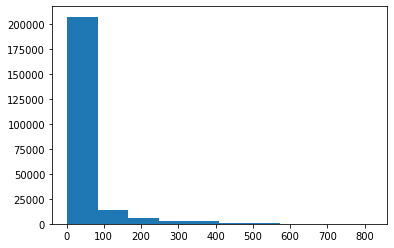

In [144]:
list_temp = df_train[df_train['D3']>1]['D3']
plt.hist(list_temp)
list_temp
# NEXT, determine which columns have decimal values that are not. 
# Can we convert deciminal numbers to floating numbers...? Can we convert a column to astype int?lets see 
# what happens if we try that... 

In [156]:
# df_train['V307'].astype(int)

list_v307_test = df_train['V307'].fillna(df_train['V307'].mode())
# try: 
list_v307_test.astype(int)

SyntaxError: unexpected EOF while parsing (<ipython-input-156-f9f2cf9d6631>, line 4)

In [166]:
list_v22_test = df_train['V22'].fillna(df_train['V22'].mode)
# df_train['V22'].unique()
list_v22_test
list_v22_test
# df_train['V22']
# df_train['V22']


0                                                         0
1                                                         0
2                                                         0
3                                                         0
4         <bound method Series.mode of 0         0.0\n1 ...
                                ...                        
590535                                                    0
590536                                                    0
590537                                                    0
590538                                                    0
590539                                                    0
Name: V22, Length: 590540, dtype: object

(array([2.49000e+02, 5.87242e+05, 2.56600e+03, 0.00000e+00, 1.22000e+02,
        3.50000e+01, 0.00000e+00, 7.00000e+00, 1.00000e+00, 4.00000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

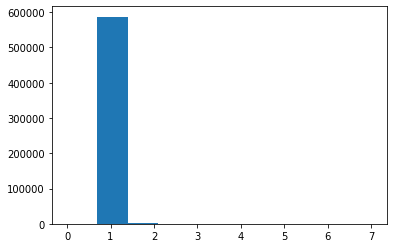

In [168]:

list_temp = df_train['V108']
list_temp
df_train['V108'].unique()
plt.hist(list_temp)

(array([478., 175., 187., 168.,  88.,  87.,  87., 127.,  87.,  87.]),
 array([ 11. ,  97.9, 184.8, 271.7, 358.6, 445.5, 532.4, 619.3, 706.2,
        793.1, 880. ]),
 <a list of 10 Patch objects>)

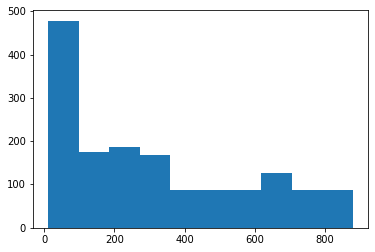

In [127]:
# we need to figure out which column is counting, which is ranking.. That's a lot of work...
# Can we just fillna 0 for counting with mode...? Or should we use 0..? Mode is appropriate. 
# CAn we fillna for ranking with 0... or fillna with mode... Mode would be appropriate. 
# Are V values supposed to be numerial or object..
# 1. Fillna for v values with mode 
# 2. Are V values supposed to be numerical or objects? 
# 3. Can we descern a counter versus ranking from a dist plot..? 
# 4. We discern categorical easily 
# 5. Can we descrne what's continuous? If so, use mean value
# mean filna - for continuous 
# mode fillna - ranking, categorical, True/False
# Should we drop certain rows? 
# Which is a counter and which is a category? We need to look at the distributions to answer this. 
# We need to clean the data before thinking about applying PCA. 
# 1. Determine which columns are continuous, which are ranking.
# 2. Determine which columns are bool (easy)
# 3. Determine which columns are categorical, then impute with pandas (we dont know which columns means what
#    so we cant assume True or better than False, etc.)
# 4. After 

list_temp = df_train[df_train['V95']>10]['V95']
list_temp
plt.hist(list_temp)

In [123]:
list_temp

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
25,2987025,0,86944,107.95,W,15385,111.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
28,2987028,0,86973,20.00,W,8431,269.0,150.0,mastercard,224.0,...,29.0,29.000000,29.000000,29.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
41,2987041,0,87220,774.00,W,9002,453.0,150.0,visa,226.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,774.000000,774.000000,774.000000
51,2987051,0,87328,226.00,W,7835,361.0,150.0,visa,226.0,...,1035.0,226.000000,2956.000000,926.000000,200.0,7213.5,1672.5,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590495,3577495,0,15810221,100.00,H,9749,181.0,150.0,visa,226.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
590511,3577511,0,15810549,130.95,W,12059,555.0,150.0,visa,226.0,...,0.0,68.949997,286.850006,68.949997,0.0,0.0,0.0,266.899994,266.899994,266.899994
590517,3577517,0,15810626,764.00,W,16873,343.0,150.0,visa,226.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,764.000000,764.000000,764.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [ ]:
list_temp

In [ ]:
# df_null_total.sort_values('total_null', ascending=False)
# np.sum(df_train['card4'].isnull())

In [22]:
# sns.distplot(df_train['V1'])

In [23]:
# print(pd.DataFrame(df_train[col_num].dtypes).reset_index())
# for val in col_num:
#     val_dtype = df_train[val].dtypes
# #     print(val)
# #     print(df_train[val][0])
#     print(str(val_dtype))
# # NEXT, ensure col num and actual values look correct. 
# df_train[col_cat].dtypes
# pd.DataFrame(np.sum(train_df.isnull())).reset_index().to_csv('fraud_detection_null.csv')

In [24]:
# # dropping columns with more than 50% missing data automatically.
# length_df = df_train.shape[0]/2
# list_temp = []
# for val in df_train.columns:
#     if np.sum(df_train[val].isnull()) > length_df:
#         list_temp.append(val)   
# df_train = df_train.drop(list_temp, axis=1)

In [25]:
# list(df_train.columns)